In [ ]:
#a)
import pandas as pd
data = pd.read_csv("compas-scores-two-years.csv")
data = data[data["days_b_screening_arrest"] <= 30]
data = data[data["days_b_screening_arrest"] >= -30]
def prosent(x):
    return round(x*100,1)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


In [ ]:
#b)
def finn_sannsynligheter(data):
    #Finner de som ble klassifisert som høy eller lav risiko:
    High_risk = data[data["score_text"].isin(["Medium","High"])]
    Low_risk = data[data["score_text"] == "Low"]

    #Finner hvor bra COMPAS gjorde det:
    Falsk_positiv = High_risk[High_risk["two_year_recid"] == 0]
    Sann_positiv = High_risk[High_risk["two_year_recid"] >= 1]
    Falsk_negativ = Low_risk[Low_risk["two_year_recid"] >= 1]
    Sann_negativ = Low_risk[Low_risk["two_year_recid"] == 0]

    #Finner estimerte sannsynlihgetsverdier:
    p_Falsk_positiv = Falsk_positiv.size/High_risk.size
    p_Sann_positiv = Sann_positiv.size/High_risk.size
    p_Falsk_negativ = Falsk_negativ.size/Low_risk.size
    p_Sann_negativ = Sann_negativ.size/Low_risk.size
    
    
    return p_Falsk_positiv, p_Sann_positiv, p_Falsk_negativ, p_Sann_negativ

def print_sannsynligheter(data):
    p_Falsk_positiv, p_Sann_positiv, p_Falsk_negativ, p_Sann_negativ = finn_sannsynligheter(data)
    #Printer sannsynlighetsverdiene:
    print("falsk positiv: ",prosent(p_Falsk_positiv),"%")
    print("sann positiv: ",prosent(p_Sann_positiv),"%")
    print("falsk negativ: ",prosent(p_Falsk_negativ),"%")
    print("sann negativ: ",prosent(p_Sann_negativ),"%")
    print()

#Finner de forskjellige typene raser:
print("Hele befolkning:")
print_sannsynligheter(data)

for kjønn in ["Male","Female"]:
    nydata = data[data["sex"] == kjønn]
    print("for ",kjønn,":")
    print_sannsynligheter(nydata)

for rase in ["Caucasian","African-American"]:
    nydata = data[data["race"] == rase]
    print("for ",rase,":")
    print_sannsynligheter(nydata)


Hele befolkning:
falsk positiv:  37.0 %
sann positiv:  63.0 %
falsk negativ:  31.5 %
sann negativ:  68.5 %

for  Male :
falsk positiv:  34.6 %
sann positiv:  65.4 %
falsk negativ:  33.4 %
sann negativ:  66.6 %

for  Female :
falsk positiv:  48.3 %
sann positiv:  51.7 %
falsk negativ:  23.9 %
sann negativ:  76.1 %

for  Caucasian :
falsk positiv:  40.5 %
sann positiv:  59.5 %
falsk negativ:  29.0 %
sann negativ:  71.0 %

for  African-American :
falsk positiv:  35.0 %
sann positiv:  65.0 %
falsk negativ:  35.1 %
sann negativ:  64.9 %



In [15]:
def p_misklassifisert(key,category,data,keys=None,risk="High"):
    """
    Gir sannsynligheten for at man har blit misklassifisert som høy risiko, 
    gitt at man er i en viss kategori (rase, kjønn, etc)

    f: står for feil
    k: står for at det er den spesifikke kategorien.
    """
    #Finner de som ble klassifisert som høy risiko:
    if keys!=None:
        data = data[data[category].isin(keys)]
    if risk == "High":
        High_risk = data[data["score_text"].isin(["Medium","High"])]
    else:
        High_risk = data[data["score_text"] == "Low"]

    #Finner hvor bra COMPAS gjorde det:
    if risk == "High":
        Falsk_positiv = High_risk[High_risk["two_year_recid"] == 0]
    else:
        Falsk_positiv = High_risk[High_risk["two_year_recid"] != 0]

    #P(misklassifisert):
    p_f=(Falsk_positiv.size)/High_risk.size

    #P(misklassifisert|man er i kategorien)
    p_f_k = (Falsk_positiv[Falsk_positiv[category] == key].size
             /High_risk[High_risk[category] == key].size)
    
    #P(man er i kategorien)
    p_k = High_risk[High_risk[category] == key].size/High_risk.size
    
    #Her bruker jeg bayes setning:
    #P(man er i kategorien| man er misklassifisert)
    p_k_f = (p_f_k*p_k)/p_f

    return p_k_f

print("sannsynlighet for å være afroamerikaner gitt at man er misklassifisert:", prosent(p_misklassifisert("African-American","race",data,["African-American","Caucasian"],risk = "High")),"%")
#print(p_misklassifisert("Caucasian","race",data,["African-American","Caucasian"],risk = "High"))

def p_etnisitet(key,category,data,keys):
    """
    Gir sannsynligheten for å være en gitt etnisitet, gitt at man begår en gjentagende forbrytelse
    """
    if keys!=None:
        data = data[data[category].isin(keys)]
    
    data_etnisitet = data[data[category] == key]

    p_f = data[data["two_year_recid"] != 0].size/data.size
    p_f_k = data_etnisitet[data_etnisitet["two_year_recid"] != 0].size/data_etnisitet.size
    p_k = data_etnisitet.size/data.size

    p_k_f = (p_f_k*p_k)/p_f

    return p_k_f

print("Sannsynlighet for å være afro amerikaner gitt at man har tilbakefall: ",prosent(p_etnisitet("African-American","race",data,["African-American","Caucasian"])),"%")
            

sannsynlighet for å være afroamerikaner gitt at man er misklassifisert: 69.4 %
Sannsynlighet for å være afro amerikaner gitt at man har tilbakefall:  66.9 %


racial bias from logistic model: 1.45
accuracy of model:  75.1 %


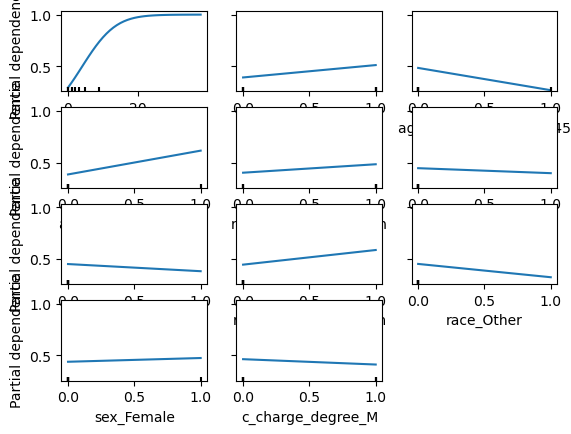

In [9]:
import sklearn.linear_model as skl
import sklearn.metrics as skm
import numpy as np

X = data[["age_cat", "race", "sex", "priors_count", "c_charge_degree", "two_year_recid"]]
#X = data[["age_cat", "race", "sex", "priors_count", "c_charge_degree", "two_year_recid","juv_fel_count","juv_misd_count","juv_other_count"]]
categorical_cols = ["age_cat", "race", "sex", "c_charge_degree"]
X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_')
X = X.drop(["age_cat_25 - 45", "race_Caucasian", "sex_Male", "c_charge_degree_F"], axis=1)
Y = data["score_text"] != "Low"

model = skl.LogisticRegression(max_iter = 1000)
model.fit(X,Y)
coef = model.coef_[0][list(X.columns).index("race_African-American")]
#coef = model.coef_[0][list(X.columns).index("sex_Female")]

def sigmoid(x):
    return np.where(x>0,1/(1+np.exp(-x)),np.exp(x)/(1+np.exp(x)))
b = model.intercept_

control = sigmoid( b )
racialBias = np.exp( coef) / (1 - control + (control * np.exp(coef)))
print("racial bias from logistic model:",round(racialBias[0],2))
from sklearn.inspection import  PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model, X,[0,1,2,3,4,5,6,7,8,9,10])
print("accuracy of model: ",round(skm.accuracy_score(model.predict(X),Y)*100,1),"%")

In [13]:
for race in ["Caucasian","African-American"]:
    Race_data=data[data["race"] == race]
    Race_y = Race_data["two_year_recid"].apply(lambda x: 1 if x>=1 else 0)
    Race_pred = Race_data["v_score_text"].map({"Low":0,"Medium":1,"High":1})
    print(race," accuracy: ",round(skm.accuracy_score(Race_pred,Race_y)*100,1),"%")
    bias_array = Race_pred.to_numpy()-Race_y.to_numpy()
    bias = np.sum(bias_array)/len(bias_array)
    print("bias: ",round(bias,2))
    print()


Caucasian  accuracy:  63.8 %
bias:  -0.17

African-American  accuracy:  61.9 %
bias:  -0.09

